In [1]:
#Importamos librerías 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime

In [2]:
#Leemos el primer archivo con los datos meteorológicos
df2 = pd.DataFrame( pd.read_csv("flujos-vid-2018.csv", engine="python" ) )
df2.head()

,Year,DoY,Hour,NEE,LE,H,Rg,Tair,Tsoil,rH,...,Tsoil_fmeth,Tsoil_fwin,PotRad,FP_NEEnight,FP_Temp,E_0,R_ref,Reco,GPP_f,GPP_fqc
0,--,--,--,umolm-2s-1,Wm-2,Wm-2,Wm-2,degC,degC,%,...,-,days,W_m-2,umolm-2s-1,degC,degK,umolm-2s-1,umolm-2s-1,umolm-2s-1,-
1,2018,7,0.5,2.56,11.52,-20.04,-0.87,16.51,20.99,43.83,...,-9999,-9999,0,-9999,16.51,207.66,0.92767,1.00713,-1.0729,1
2,2018,7,1,4.07,15.11,-7.34,-0.97,16.61,21.05,46.82,...,-9999,-9999,0,-9999,16.61,207.66,0.92767,1.01249,-9.62E-01,1
3,2018,7,1.5,0.92,8.61,-9.76,-0.96,16.07,21.09,46.65,...,-9999,-9999,0,-9999,16.07,207.66,0.92767,0.98371,-1.1643,1
4,2018,7,2,0.41,1.93,-8.55,-2.06,16.06,21.09,46.27,...,-9999,-9999,0,-9999,16.06,207.66,0.92767,0.98318,-1.1648,1


In [3]:
df2.dtypes

Year             object
DoY              object
Hour             object
NEE              object
LE               object
H                object
Rg               object
Tair             object
Tsoil            object
rH               object
VPD              object
Ustar            object
Ustar_Thres      object
Ustar_fqc        object
NEE_orig         object
NEE_f            object
NEE_fqc          object
NEE_fall         object
NEE_fall_qc      object
NEE_fnum         object
NEE_fsd          object
NEE_fmeth        object
NEE_fwin         object
LE_orig          object
LE_f             object
LE_fqc           object
LE_fall          object
LE_fall_qc       object
LE_fnum          object
LE_fsd           object
                  ...  
rH_fnum          object
rH_fsd           object
rH_fmeth         object
rH_fwin          object
Tair_orig        object
Tair_f           object
Tair_fqc         object
Tair_fall        object
Tair_fall_qc     object
Tair_fnum        object
Tair_fsd        

In [4]:
df2 = df2.filter(['Year','DoY','Hour','Rg_f','LE_f','H_f'],axis=1)
df2.head()

,Year,DoY,Hour,Rg_f,LE_f,H_f
0,--,--,--,Wm-2,Wm-2,Wm-2
1,2018,7,0.5,-0.87,11.52,-20.04
2,2018,7,1,-0.97,15.11,-7.34
3,2018,7,1.5,-0.96,8.61,-9.76
4,2018,7,2,-2.06,1.93,-8.55


In [5]:
#Quitamos la primera fila con las unidades
df2 = df2.drop(df2.index[0]).reset_index(drop=True)
df2.head(50)

,Year,DoY,Hour,Rg_f,LE_f,H_f
0,2018,7,0.5,-0.87,11.52,-20.04
1,2018,7,1,-0.97,15.11,-7.34
2,2018,7,1.5,-0.96,8.61,-9.76
3,2018,7,2,-2.06,1.93,-8.55
4,2018,7,2.5,-1.32,6.40,-0.55
5,2018,7,3,-1.22,2.44,-2.92
6,2018,7,3.5,-1.14,2.40,-2.61
7,2018,7,4,-1.74,2.49,-1.29
8,2018,7,4.5,-1.24,5.80,-8.07
9,2018,7,5,-1.31,2.39,3.08


In [6]:
#Para hacer una variable de fecha, tenemos que crear un arreglo de horas
#Para esto convertimos la columna correspondientes a tipo string.
df2['Hour'] = df2['Hour'].astype(str)
df2.dtypes

Year    object
DoY     object
Hour    object
Rg_f    object
LE_f    object
H_f     object
dtype: object

In [7]:
#Llenamos el arreglo de horas y minutos

hora=[]
minuto=[]

for i in range (0, len(df2)):

    #Primero revisaremos si contiene 1 caracter:
    if (len(str(df2['Hour'][i]))==1):
            hora.append(str(df2['Hour'][i])[0:1])
            minuto.append('00')
        
    #Si resulta ser de 2 caracteres:
    if(len(str(df2['Hour'][i]))==2):
        if (str(df2['Hour'][i])[0:2]=='24'):
            hora.append('00')
            minuto.append('00')
        else:        
            hora.append(str(df2['Hour'][i])[0:2])
            minuto.append('00')
    
    #Si resulta ser de 3 caracteres:
    elif(len(str(df2['Hour'][i]))==3):
            hora.append(str(df2['Hour'][i])[0:1])
            minuto.append('30')

    #Si resulta ser de 3 caracteres:
    elif(len(str(df2['Hour'][i]))==4):
            hora.append(str(df2['Hour'][i])[0:2])
            minuto.append('30')
        
#Arreglo para los días
dias =[df2['DoY'][i] for i in range(0,len(df2))]

In [8]:
#Creamos un data frame con las horas, minutos y días del df2
d = {'dias': dias, 'hora': hora, 'minuto':minuto}
df_fechas = pd.DataFrame(data=d)
df_fechas.head(50)

,dias,hora,minuto
0,7,0,30
1,7,1,00
2,7,1,30
3,7,2,00
4,7,2,30
5,7,3,00
6,7,3,30
7,7,4,00
8,7,4,30
9,7,5,00


In [9]:
#Convertimos la primera columna a tipo float64
df_fechas['dias'] = df_fechas['dias'].apply(lambda col:pd.to_numeric(col, errors='coerce'))
df_fechas.dtypes

dias       int64
hora      object
minuto    object
dtype: object

In [10]:
#En la nueva columna "dia", aumentamos un día a "dias" cuando marque la hora 00:00
dia=[]
for i in range(0,len(df_fechas)):
    if (df_fechas['hora'][i]=='00' and df_fechas['minuto'][i]=='00'):
        dia.append(df_fechas['dias'][i] +1)
    else:
        dia.append(df_fechas['dias'][i])
df_fechas['dia']=dia
df_fechas.head(50)

,dias,hora,minuto,dia
0,7,0,30,7
1,7,1,00,7
2,7,1,30,7
3,7,2,00,7
4,7,2,30,7
5,7,3,00,7
6,7,3,30,7
7,7,4,00,7
8,7,4,30,7
9,7,5,00,7


In [11]:
#Creamos una variable de tipo string con el año, el número de día, la hora y el minuto
fechas = []
for i in range (0,len(df2)):
    fechas.append('2009 '+str(df_fechas['dia'][i])+ ' ' + df_fechas['hora'][i]+' '+df_fechas['minuto'][i])

In [12]:
#Convertimos los elementos del arreglo fechas a variables tipo datetime
FECHA = []
for i in range(0,len(df2)):
    d=datetime.datetime.strptime(fechas[i],'%Y %j %H %M')
    F = d.isoformat(' ')
    FECHA.append(F)

In [13]:
#Antes de agregar la columna de FECHA al dataframe, convertimos los valores de este a tipo float64
df2 = df2.apply(pd.to_numeric, errors='coerce')
df2.dtypes

Year      int64
DoY       int64
Hour    float64
Rg_f    float64
LE_f    float64
H_f     float64
dtype: object

In [14]:
#Agregamos la columna FECHA al dataframe
df2['FECHAN']=FECHA
df2.tail()

,Year,DoY,Hour,Rg_f,LE_f,H_f,FECHAN
17227,2018,365,22.0,-1.93,2.79,-0.75,2009-12-31 22:00:00
17228,2018,365,22.5,-2.00,0.63,-3.72,2009-12-31 22:30:00
17229,2018,365,23.0,-2.11,1.06,-3.49,2009-12-31 23:00:00
17230,2018,365,23.5,-1.92,-0.46,-9.24,2009-12-31 23:30:00
17231,2018,365,24.0,-2.64,-2.29,27.24,2010-01-01 00:00:00


In [15]:
#Convertimos la columna FECHAN a tipo datetime
df2['FECHA'] = pd.to_datetime(df2.apply(lambda x: x['FECHAN'], 1), dayfirst=True)
df2 = df2.drop(['FECHAN','Year','DoY','Hour'], 1)
df2.dtypes

Rg_f            float64
LE_f            float64
H_f             float64
FECHA    datetime64[ns]
dtype: object

In [16]:
df2.tail()

,Rg_f,LE_f,H_f,FECHA
17227,-1.93,2.79,-0.75,2009-12-31 22:00:00
17228,-2.00,0.63,-3.72,2009-12-31 22:30:00
17229,-2.11,1.06,-3.49,2009-12-31 23:00:00
17230,-1.92,-0.46,-9.24,2009-12-31 23:30:00
17231,-2.64,-2.29,27.24,2010-01-01 00:00:00


In [17]:
df2['MES'] = df2['FECHA'].dt.month
df2['DIA'] = df2['FECHA'].dt.day
df2['HORA'] = df2['FECHA'].dt.hour

df2.dtypes

Rg_f            float64
LE_f            float64
H_f             float64
FECHA    datetime64[ns]
MES               int64
DIA               int64
HORA              int64
dtype: object

In [18]:
df2["Rg_f_mean"] =df2.groupby(["MES","DIA","HORA"])["Rg_f"].transform("mean")
df2["LE_f_mean"] =df2.groupby(["MES","DIA","HORA"])["LE_f"].transform("mean")
df2["H_f_mean"] =df2.groupby(["MES","DIA","HORA"])["H_f"].transform("mean")

df2=df2.drop_duplicates(subset=["Rg_f_mean",'LE_f_mean','H_f_mean'])
df2.head()

,Rg_f,LE_f,H_f,FECHA,MES,DIA,HORA,Rg_f_mean,LE_f_mean,H_f_mean
0,-0.87,11.52,-20.04,2009-01-07 00:30:00,1,7,0,-0.870,11.520,-20.040
1,-0.97,15.11,-7.34,2009-01-07 01:00:00,1,7,1,-0.965,11.860,-8.550
3,-2.06,1.93,-8.55,2009-01-07 02:00:00,1,7,2,-1.690,4.165,-4.550
5,-1.22,2.44,-2.92,2009-01-07 03:00:00,1,7,3,-1.180,2.420,-2.765
7,-1.74,2.49,-1.29,2009-01-07 04:00:00,1,7,4,-1.490,4.145,-4.680


In [30]:
#Reducimos el dataframe al mes de febrero
df3=df2[df2['MES']==2]
df3=df3.reset_index(drop=True)
df3.tail()

,Rg_f,LE_f,H_f,FECHA,MES,DIA,HORA,Rg_f_mean,LE_f_mean,H_f_mean
667,-2.84,-0.27,0.84,2009-02-28 19:00:00,2,28,19,-2.405,-1.180,-5.110
668,-3.27,2.58,-34.56,2009-02-28 20:00:00,2,28,20,-3.620,1.840,-33.395
669,-4.15,2.46,-26.03,2009-02-28 21:00:00,2,28,21,-4.215,1.775,-26.950
670,-3.90,6.32,-20.26,2009-02-28 22:00:00,2,28,22,-3.885,5.175,-19.175
671,-3.60,-0.36,-11.98,2009-02-28 23:00:00,2,28,23,-3.235,0.000,-10.845


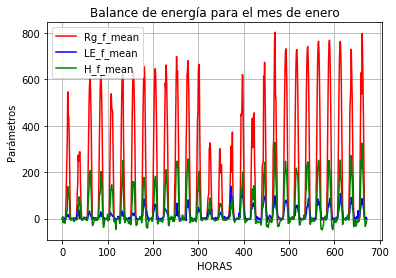

In [32]:
#Gráfica de balance de energía para el mes de febrero

Y1 = df3['Rg_f_mean']          #Valores a graficar en eje Y (1)
Y2 = df3['LE_f_mean']          #Valores a graficar en eje Y (2)
Y3 = df3['H_f_mean']         #Valores a graficar en eje Y (3)

plt.plot(Y1, label="Rg_f_mean", color = 'r')   #Especficiaciones para graficar nuestros datos en Y (1)
plt.xlabel("HORAS")                                           #Nombre del eje X
plt.ylabel("Parámetros")                               #Nombre del eje Y

plt.grid()
plt.plot(Y2, label="LE_f_mean", color = 'b')   #Especificaciones para graficar nuestros datos en Y (2)
plt.legend()                                                #Leyenda

plt.plot(Y3, label="H_f_mean", color = 'g')  #Especificaciones para graficar nuestros datos en Y (3)
plt.legend()                                                #Leyenda

plt.title('Balance de energía para el mes de febrero')  #Título de la gráfica
plt.savefig('balance_febrero',plt=2000)                            #Guardamos la gráfica como una imágen
plt.show()                                                  #Mostramos la gráfica



In [37]:
#Reducimos el dataframe al 1ero de febrero
df4=df3[df3['DIA']==1]
df4=df4.reset_index(drop=True)
df4.head()

,Rg_f,LE_f,H_f,FECHA,MES,DIA,HORA,Rg_f_mean,LE_f_mean,H_f_mean
0,-3.53,3.37,-0.88,2009-02-01 00:00:00,2,1,0,-2.955,1.895,-2.275
1,-3.53,2.72,22.67,2009-02-01 01:00:00,2,1,1,-2.725,1.630,8.720
2,-1.61,1.27,-12.13,2009-02-01 02:00:00,2,1,2,-2.060,1.340,-17.470
3,-3.71,0.44,-5.43,2009-02-01 03:00:00,2,1,3,-3.025,0.975,-6.600
4,-1.37,-4.90,-8.51,2009-02-01 04:00:00,2,1,4,-1.760,-2.405,-10.330


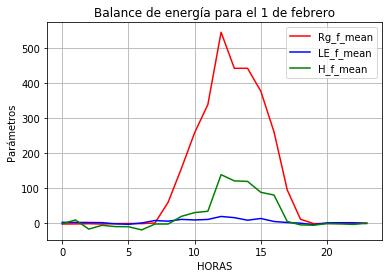

In [40]:
HORAS=[i for i in range(0,24)]

#Gráfica de balance de energía para el 1ero de febrero
X = HORAS                            #Eje X
N = np.arange(24)           #Longitud del arreglo de datos
Y1 = df4['Rg_f_mean']          #Valores a graficar en eje Y (1)
Y2 = df4['LE_f_mean']          #Valores a graficar en eje Y (2)
Y3 = df4['H_f_mean']         #Valores a graficar en eje Y (3)

plt.plot(X, Y1, label="Rg_f_mean", color = 'r')   #Especficiaciones para graficar nuestros datos en Y (1)
plt.xlabel("HORAS")                                           #Nombre del eje X
plt.ylabel("Parámetros")                               #Nombre del eje Y

plt.grid()
plt.plot(Y2, label="LE_f_mean", color = 'b')   #Especificaciones para graficar nuestros datos en Y (2)
plt.legend()                                                #Leyenda

plt.plot(Y3, label="H_f_mean", color = 'g')  #Especificaciones para graficar nuestros datos en Y (3)
plt.legend()                                                #Leyenda

plt.title('Balance de energía para el 1 de febrero')  #Título de la gráfica
plt.savefig('balance_febrero1',plt=2000)                            #Guardamos la gráfica como una imágen
plt.show()                                                  #Mostramos la gráfica



In [48]:
#Promedio por hora en febrero
df5=pd.DataFrame()
df5['HORA']=df3['HORA']
df5['FECHA']=df3['FECHA']
df5["Rg_f_mean"] =df3.groupby(["HORA"])["Rg_f_mean"].transform("mean")
df5["LE_f_mean"] =df3.groupby(["HORA"])["LE_f_mean"].transform("mean")
df5["H_f_mean"] =df3.groupby(["HORA"])["H_f_mean"].transform("mean")
df5=df5.drop_duplicates(subset=["Rg_f_mean",'LE_f_mean','H_f_mean'])



df5.head(50)


,HORA,FECHA,Rg_f_mean,LE_f_mean,H_f_mean
0,0,2009-02-01 00:00:00,-1.990179,0.677679,-5.661964
1,1,2009-02-01 01:00:00,-1.904107,1.733214,-3.928571
2,2,2009-02-01 02:00:00,-1.951607,0.513929,-3.977143
3,3,2009-02-01 03:00:00,-1.728571,1.542321,-3.857679
4,4,2009-02-01 04:00:00,-1.736429,1.647321,-3.604643
5,5,2009-02-01 05:00:00,-1.581429,1.698571,-4.164286
6,6,2009-02-01 06:00:00,-1.655357,1.726607,-5.723393
7,7,2009-02-01 07:00:00,6.155000,1.387500,-5.159286
8,8,2009-02-01 08:00:00,98.476429,11.938571,10.519107
9,9,2009-02-01 09:00:00,245.613929,25.270357,49.713036


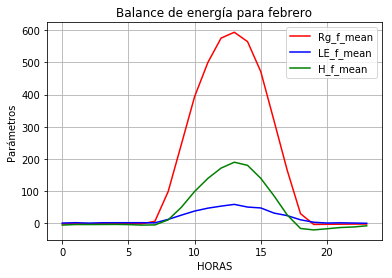

In [49]:
#Gráfica de balance de energía para febrero (promedio de cada una de las horas)
X = HORAS                            #Eje X
N = np.arange(24)           #Longitud del arreglo de datos
Y1 = df5['Rg_f_mean']          #Valores a graficar en eje Y (1)
Y2 = df5['LE_f_mean']          #Valores a graficar en eje Y (2)
Y3 = df5['H_f_mean']         #Valores a graficar en eje Y (3)

plt.plot(X, Y1, label="Rg_f_mean", color = 'r')   #Especficiaciones para graficar nuestros datos en Y (1)
plt.xlabel("HORAS")                                           #Nombre del eje X
plt.ylabel("Parámetros")                               #Nombre del eje Y

plt.grid()
plt.plot(Y2, label="LE_f_mean", color = 'b')   #Especificaciones para graficar nuestros datos en Y (2)
plt.legend()                                                #Leyenda

plt.plot(Y3, label="H_f_mean", color = 'g')  #Especificaciones para graficar nuestros datos en Y (3)
plt.legend()                                                #Leyenda

plt.title('Balance de energía para febrero')  #Título de la gráfica
plt.savefig('balance_febrero1',plt=2000)                            #Guardamos la gráfica como una imágen
plt.show()                                                  #Mostramos la gráfica

